# 18DCE097 Muskaan Pirani
**Project title: Weather Forecast using LSTM**

1.   Main aim is to reduce RMSE values for accurate predictions.
2.   We have taken dataset from Kaggle to predict the temperature of a particular place.

* Train RMSE: 1.39 RMSE
* Test RMSE: 1.38 RMSE




In [ ]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('/content/farm_temperature_data.csv', usecols=[1])
dataset = dataframe.values
dataset = dataset.astype('float32')
dataframe.head()

,Temperature
0,29.885937
1,33.194920
2,32.846075
3,32.182273
4,32.139718


In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(64, input_shape=(1, look_back), return_sequences=True))
model.add(LSTM(16, input_shape=(1, look_back), return_sequences=True))
model.add(LSTM(4, input_shape=(1, look_back), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# # create and fit the BiLSTM network
# model = Sequential()
# model.add(Bidirectional(LSTM(64, input_shape=(1, look_back), return_sequences=True)))
# model.add(Bidirectional(LSTM(16, input_shape=(1, look_back), return_sequences=True)))
# model.add(Bidirectional(LSTM(4, input_shape=(1, look_back), return_sequences=False)))
# model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
726/726 - 6s - loss: 0.0799 - accuracy: 0.0028
Epoch 2/20
726/726 - 2s - loss: 0.0223 - accuracy: 0.0028
Epoch 3/20
726/726 - 2s - loss: 0.0165 - accuracy: 0.0028
Epoch 4/20
726/726 - 2s - loss: 0.0152 - accuracy: 0.0028
Epoch 5/20
726/726 - 2s - loss: 0.0126 - accuracy: 0.0028
Epoch 6/20
726/726 - 2s - loss: 0.0114 - accuracy: 0.0028
Epoch 7/20
726/726 - 2s - loss: 0.0105 - accuracy: 0.0028
Epoch 8/20
726/726 - 2s - loss: 0.0083 - accuracy: 0.0028
Epoch 9/20
726/726 - 2s - loss: 0.0077 - accuracy: 0.0028
Epoch 10/20
726/726 - 2s - loss: 0.0074 - accuracy: 0.0028
Epoch 11/20
726/726 - 2s - loss: 0.0072 - accuracy: 0.0028
Epoch 12/20
726/726 - 2s - loss: 0.0069 - accuracy: 0.0028
Epoch 13/20
726/726 - 2s - loss: 0.0065 - accuracy: 0.0028
Epoch 14/20
726/726 - 2s - loss: 0.0070 - accuracy: 0.0028
Epoch 15/20
726/726 - 2s - loss: 0.0073 - accuracy: 0.0028
Epoch 16/20
726/726 - 2s - loss: 0.0064 - accuracy: 0.0028
Epoch 17/20
726/726 - 2s - loss: 0.0071 - accuracy: 0.0028
Epoch 

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = numpy.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = numpy.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.39 RMSE
Test Score: 1.38 RMSE


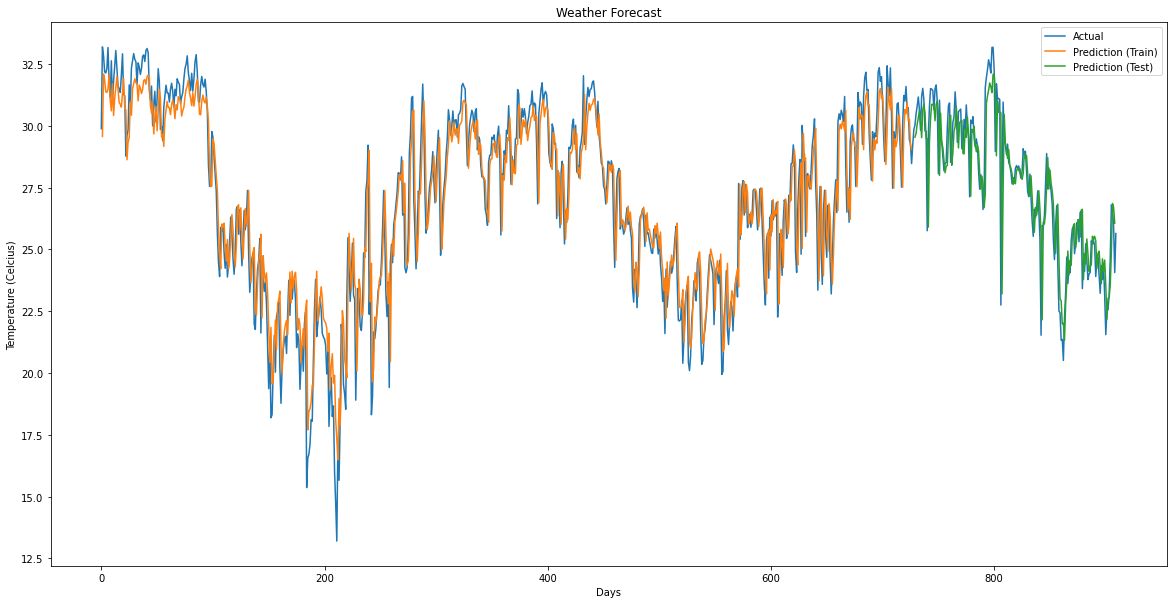

In [ ]:
# shift train predictions for plotting
plt.figure(figsize=(20,10))
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.title("Weather Forecast")
plt.xlabel("Days")
plt.ylabel("Temperature (Celcius)")
plt.plot(scaler.inverse_transform(dataset), label="Actual")
plt.plot(trainPredictPlot, label="Prediction (Train)")
plt.plot(testPredictPlot, label="Prediction (Test)")
plt.legend(loc="upper right")
plt.show()